In [2]:
import numpy as np
import matplotlib.pyplot as plt

<h1> Taylor/Maclaurin series expansion to $sin(x)$ about $x=0$</h1>

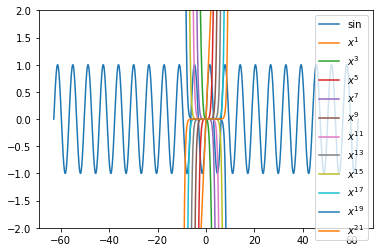

In [3]:
import numpy as np  #imports maths functions
import matplotlib.pyplot as plt
from scipy.special import factorial

x = np.linspace(-10*2*np.pi,10*2*np.pi,10000)
# x = np.arange(-2*np.pi, 2*np.pi, .1*np.pi)

def sin_approx(x,n):
    #out = np.full(len(x),0)   # array of integers
    #out = np.full(len(x),0.,dtype=np.float64)  # big empty array for output
    out = []
    for i in range(0,n+1):   # loops until n, not n+1
        out.append( (-1)**(i) * x**(2*i+1)/factorial(2*i+1))
    return out

n=10
y = np.sin(x)
plt.plot(x,y,label='sin')
out = sin_approx(x,n)
out_sum = np.sum(out, axis=0)
#plt.plot(x,out_sum,label='sum up to $x^{'+'{}'.format(2*n+1)+'}$')
for i in range(len(out)):
    plt.plot(x,out[i], label='$x^{'+'{}'.format(2*i+1)+'}$')
plt.ylim([-2,2]);
plt.legend();

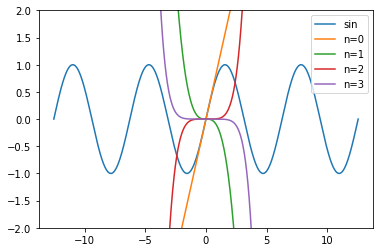

In [118]:
import numpy as np  #imports maths functions
import matplotlib.pyplot as plt  #
from scipy.special import factorial

x = np.linspace(-2*2*np.pi,2*2*np.pi,1000)
# x = np.arange(-2*np.pi, 2*np.pi, .1*np.pi)

def sin_approx(x,n):
    #out = np.full(len(x),0)   # array of integers
    #out = np.full(len(x),0.,dtype=np.float64)  # big empty array for output
    out = []
    for i in range(0,n+1):   # loops until n, not n+1
        out.append( (-1)**(i) * x**(2*i+1)/factorial(2*i+1))
    return out

n=3
y = np.sin(x)
plt.plot(x,y,label='sin')
out = sin_approx(x,n)
for i in range(len(out)):
    plt.plot(x,out[i], label='n={}'.format(i))
    #plt.plot(x,sin_approx(x,n), label='$x^{'+'{}'.format(2*n+1)+'}$')
plt.ylim([-2,2])
plt.legend();

In [4]:
def S_rep(r,n):
    right = np.empty(n)  # amount that exits at x=1 at each iteration
    left = np.empty(n)   # amount that exits at x=0 at each iteration
    inside = np.empty(n)  # amount that is left in cavity after each iteration (starts at 1 before any losses)

    # for i = 0
    right[0] = 1-r
    left[0] = r*(1-r)
    inside[0] = r*r

    for i in range(1,n):
        
        # amount that exits to the right
        right[i] = inside[i-1]*(1-r)
        
        # amount that exists to the left
        left[i] = inside[i-1]*r*(1-r)
        
        # amount that is left after right and left bounces
        inside[i] = inside[i-1]*(r**2)
    
    return right, left, inside

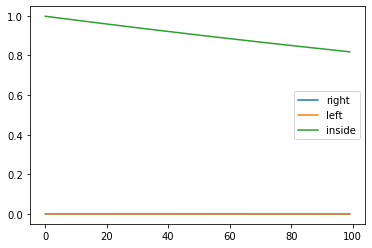

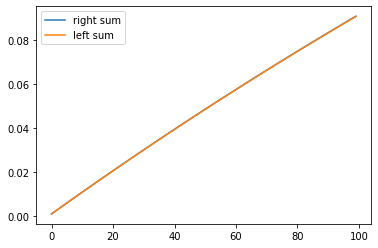

In [104]:
right, left, inside = S_rep(.999,100)
plt.plot(right,label='right')
plt.plot(left,label='left')
plt.plot(inside,label='inside')
plt.legend()
plt.figure()
plt.plot(np.cumsum(right),label='right sum')
plt.plot(np.cumsum(left),label='left sum')
plt.legend();

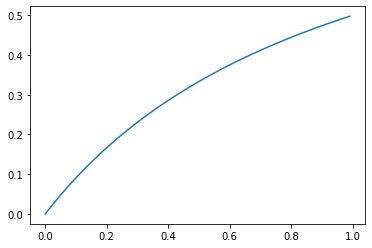

In [107]:
r=np.arange(0,1,.01)
plt.plot(r,r/(1+r))

In [7]:
import numpy as np
a=np.arange(0,10,.1)
print(a)
print(5j*a)

[0.  0.1 0.2 0.3 0.4 0.5 0.6 0.7 0.8 0.9 1.  1.1 1.2 1.3 1.4 1.5 1.6 1.7
 1.8 1.9 2.  2.1 2.2 2.3 2.4 2.5 2.6 2.7 2.8 2.9 3.  3.1 3.2 3.3 3.4 3.5
 3.6 3.7 3.8 3.9 4.  4.1 4.2 4.3 4.4 4.5 4.6 4.7 4.8 4.9 5.  5.1 5.2 5.3
 5.4 5.5 5.6 5.7 5.8 5.9 6.  6.1 6.2 6.3 6.4 6.5 6.6 6.7 6.8 6.9 7.  7.1
 7.2 7.3 7.4 7.5 7.6 7.7 7.8 7.9 8.  8.1 8.2 8.3 8.4 8.5 8.6 8.7 8.8 8.9
 9.  9.1 9.2 9.3 9.4 9.5 9.6 9.7 9.8 9.9]
[0. +0.j  0. +0.5j 0. +1.j  0. +1.5j 0. +2.j  0. +2.5j 0. +3.j  0. +3.5j
 0. +4.j  0. +4.5j 0. +5.j  0. +5.5j 0. +6.j  0. +6.5j 0. +7.j  0. +7.5j
 0. +8.j  0. +8.5j 0. +9.j  0. +9.5j 0.+10.j  0.+10.5j 0.+11.j  0.+11.5j
 0.+12.j  0.+12.5j 0.+13.j  0.+13.5j 0.+14.j  0.+14.5j 0.+15.j  0.+15.5j
 0.+16.j  0.+16.5j 0.+17.j  0.+17.5j 0.+18.j  0.+18.5j 0.+19.j  0.+19.5j
 0.+20.j  0.+20.5j 0.+21.j  0.+21.5j 0.+22.j  0.+22.5j 0.+23.j  0.+23.5j
 0.+24.j  0.+24.5j 0.+25.j  0.+25.5j 0.+26.j  0.+26.5j 0.+27.j  0.+27.5j
 0.+28.j  0.+28.5j 0.+29.j  0.+29.5j 0.+30.j  0.+30.5j 0.+31.j  0.+31.5j
 0.+32.j 

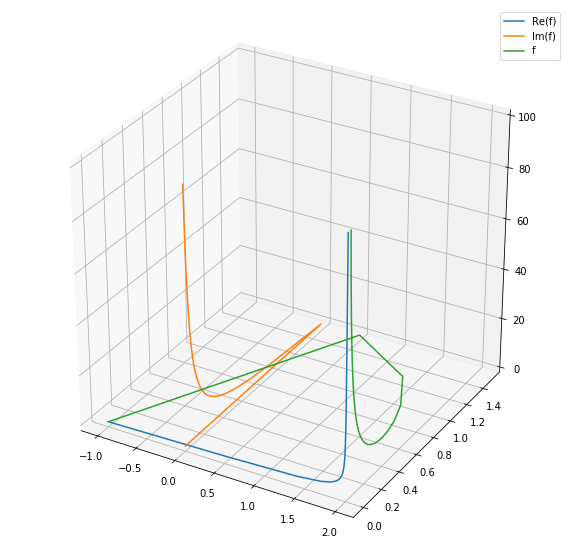

In [9]:
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['legend.fontsize'] = 10
fig = plt.figure(figsize=(10,10))
ax = fig.gca(projection='3d')

# create our function
t = np.linspace(0,100,100)
f = (1j+2*t)/(t-1j)

ax.plot(np.real(f), np.zeros_like(f), t, label='Re(f)')
ax.plot(np.zeros_like(f), np.imag(f), t, label='Im(f)')
ax.plot(np.real(f), np.imag(f), t, label='f')
ax.legend()
f
plt.show()

In [82]:
from sympy import Symbol, sin, cos, series

x = Symbol('x')

series(x/sin(x),x,x0=0,n=8)

1 + x**2/6 + 7*x**4/360 + 31*x**6/15120 + O(x**8)

In [91]:
del x

<h2>Linear algebra</h2>

In [71]:
import numpy as np  #imports maths functions
import matplotlib.pyplot as plt  # import plotting functions

In [69]:
A=[[3,5],[2,3]]
print(type(A))
print(A)
np.linalg.det(A)

<class 'list'>
[[3, 5], [2, 3]]


-0.9999999999999996

In [100]:
A=np.array([[3,5],[2,3]],dtype=np.float64)
print(type(A))
print(A.dtype)
print(A)
np.linalg.det(A)

<class 'numpy.ndarray'>
float64
[[3. 5.]
 [2. 3.]]


-0.9999999999999996

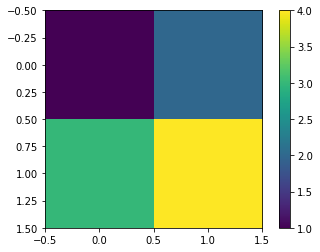

In [101]:
plt.imshow(np.array([[1,2],[3,4]]));
plt.colorbar();

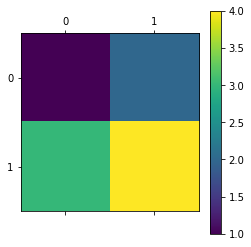

In [104]:
plt.matshow(np.array([[1,2],[3,4]]));
plt.colorbar();

In [10]:
A=np.identity(3)
print(A)
np.linalg.det(A)

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


1.0

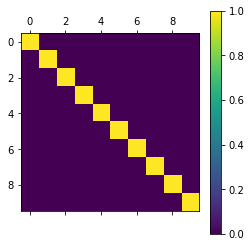

In [105]:
plt.matshow(np.identity(10))
plt.colorbar();

In [106]:
# element-wise vs. matrix multiplication
A=np.array([[1,1],[2,2]])
B=np.array([[1,2],[3,4]])

out = np.empty((2,2))
for i in range(2):
    for j in range(2):
        out[i,j] = A[i,j]*B[i,j]
print(out)

print(A*B)
print()
print(np.matmul(A,B))
print()
print(np.dot(A,B))

[[1. 2.]
 [6. 8.]]
[[1 2]
 [6 8]]

[[ 4  6]
 [ 8 12]]

[[ 4  6]
 [ 8 12]]


In [43]:
# element-wise powers
A=np.array([[1,2],[3,4]])
print(A*A)
print()
print(A**2)

[[ 1  4]
 [ 9 16]]

[[ 1  4]
 [ 9 16]]


In [107]:
# matrix powers
A=np.array([[3,4],[5,6]])
print(np.matmul(A,A))
print()
print(np.dot(A,A))
print()
print(np.linalg.matrix_power(A,10))

[[29 36]
 [45 56]]

[[29 36]
 [45 56]]

[[ 1508850509  1876101876]
 [-1949839951 -1379040380]]


In [45]:
# matrix inverse

A=np.array([[3,4],[5,6]])
B=np.linalg.inv(A)

print(B)
print()
print(np.dot(A,B))

[[-3.   2. ]
 [ 2.5 -1.5]]

[[ 1.00000000e+00  0.00000000e+00]
 [-1.77635684e-15  1.00000000e+00]]


[[1. 0.]
 [0. 1.]]

[[0 1]
 [1 0]]

[[0. 1. 0. 0.]
 [1. 0. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 1. 0.]]

[[0.+0.j 0.+0.j 0.-0.j 0.-1.j]
 [0.+0.j 0.+0.j 0.-1.j 0.-0.j]
 [0.+0.j 0.+1.j 0.+0.j 0.+0.j]
 [0.+1.j 0.+0.j 0.+0.j 0.+0.j]]


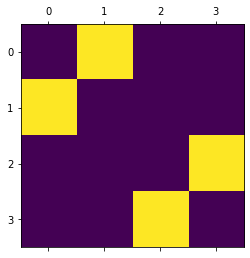

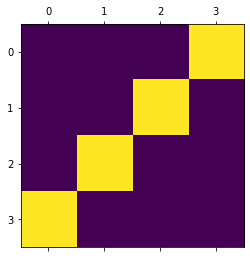

In [112]:
# Kronecker product

pauli_x = np.array([[0,1],[1,0]])
pauli_y = np.array([[0,-1j],[1j,0]])
pauli_z = np.array([[1,0],[0,-1]])

i = np.identity(2)

print(i)
print()
print(pauli_x)
print()
print(np.kron(i,pauli_x))
plt.matshow(np.kron(i,pauli_x))
print()
print(np.kron(pauli_y,pauli_x))
plt.matshow(np.abs(np.kron(pauli_y,pauli_x)))

<h3>Quiz 1 questions</h3>

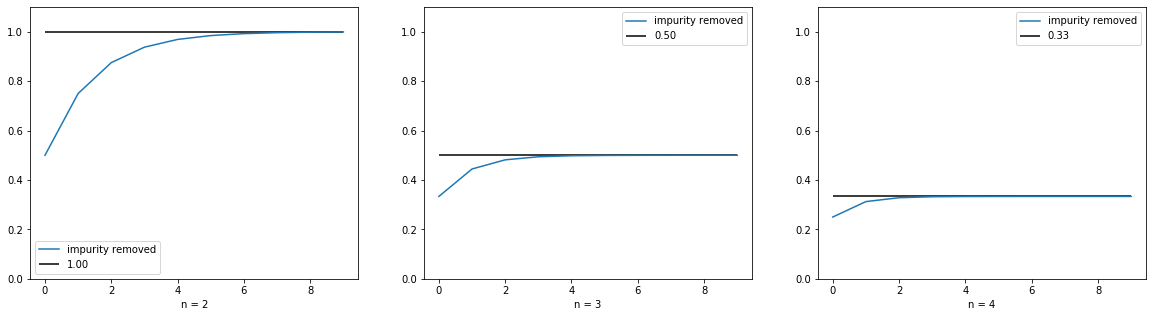

In [104]:
# Boas 1.1.12

def impurity(n,ax):
    k = 10
    x = np.arange(k)
    y = np.empty(k)
    y[0] = 1/n
    for i in x[1:]:
        y[i] = y[i-1]*(1/n)
    removed = np.cumsum(y)
    limit = (1/n)/(1-(1/n))
    ax.set_xlabel('n = {}'.format(n))
    ax.plot(x,removed,label='impurity removed')
    ax.hlines(limit,x[0],x[-1],label='{:.2f}'.format(limit))
    ax.set_ylim([0,1.1])
    ax.legend()

fig, axes = plt.subplots(1, 3, figsize=(20,5))
impurity(2,axes[0])
impurity(3,axes[1])
impurity(4,axes[2])

In [201]:
# Boas 1.13.10

from sympy import Symbol, sin, cos, series
x = Symbol('x')

series(sin(x),x,x0=0,n=16)

x - x**3/6 + x**5/120 - x**7/5040 + x**9/362880 - x**11/39916800 + x**13/6227020800 - x**15/1307674368000 + O(x**16)

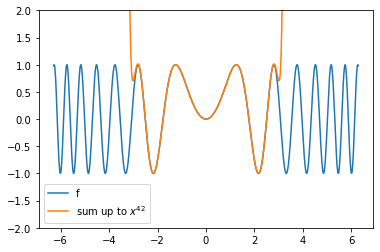

In [232]:
from scipy.special import factorial

x = np.linspace(-2*np.pi,2*np.pi,1000)

def f(x):
    return np.sin(x**2)

def f_approx(x,n):
    #out = np.full(len(x),0)   # array of integers
    #out = np.full(len(x),0.,dtype=np.float64)  # big empty array for output
    out = []
    for i in range(0,n+1):   # loops until n, not n+1
        out.append( (-1)**(i) * x**(4*i+2)/factorial(2*i+1))
    return out

n=10
y = f(x)
plt.plot(x,y,label='f')
out = f_approx(x,n)
out_sum = np.sum(out, axis=0)
plt.plot(x,out_sum,label='sum up to $x^{'+'{}'.format(4*n+2)+'}$')
#for i in range(len(out)):
#    plt.plot(x,out[i], label='$x^{'+'{}'.format(4*i+2)+'}$')
plt.ylim([-2,2]);
plt.legend();

In [127]:
# Boas 1.13.40

from sympy import Symbol, series
x = Symbol('x')

series(1/x, x, x0=1, n=5)

2 + (x - 1)**2 - (x - 1)**3 + (x - 1)**4 - x + O((x - 1)**5, (x, 1))

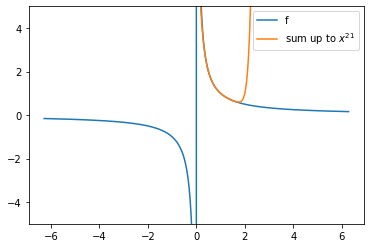

In [237]:
from scipy.special import factorial

x = np.linspace(-2*np.pi,2*np.pi,1000)

def f(x):
    return 1/x

def f_approx(x,n):
    #out = np.full(len(x),0)   # array of integers
    #out = np.full(len(x),0.,dtype=np.float64)  # big empty array for output
    out = []
    for i in range(0,n+1):   # loops until n, not n+1
        out.append( (-1)**(i) * (x-1)**i)
    return out

n=10
y = f(x)
plt.plot(x,y,label='f')
out = f_approx(x,n)
out_sum = np.sum(out, axis=0)
plt.plot(x,out_sum,label='sum up to $x^{'+'{}'.format(2*n+1)+'}$')
#for i in range(len(out)):
#    plt.plot(x,out[i], label='$x^{'+'{}'.format(4*i+2)+'}$')
plt.ylim([-5,5]);
plt.legend();

In [53]:
# properties of complex numbers

x=3+4j
print('abs=',np.abs(x))
print('angle=',np.angle(x)*180/np.pi)
print('real=',np.real(x))
print('imag=',np.imag(x))

abs= 5.0
angle= 53.13010235415598
real= 3.0
imag= 4.0


In [45]:
# matrix exponentiation
import scipy.linalg

# matrix exponents

a = np.array([[1,0,0],[0,2,0],[0,0,3]])
print(a)
print()
print(np.e**a)  # element-wise exponent
print()
print(np.exp(a))  # element-wise exponent
print()
print(scipy.linalg.expm(a))  # matrix exponent
print()
print(2**a)  #element-wise exponent
print()
print(scipy.linalg.expm(np.log(2)*a))  # matix exponent

[[1 0 0]
 [0 2 0]
 [0 0 3]]

[[ 2.71828183  1.          1.        ]
 [ 1.          7.3890561   1.        ]
 [ 1.          1.         20.08553692]]

[[ 2.71828183  1.          1.        ]
 [ 1.          7.3890561   1.        ]
 [ 1.          1.         20.08553692]]

[[ 2.71828183  0.          0.        ]
 [ 0.          7.3890561   0.        ]
 [ 0.          0.         20.08553692]]

[[2 1 1]
 [1 4 1]
 [1 1 8]]

[[2. 0. 0.]
 [0. 4. 0.]
 [0. 0. 8.]]


In [225]:
# solving a system of equations
a = np.array([[3,1], [1,2]])
b = np.array([9,8])
x = np.linalg.solve(a, b)
print(x)

[2. 3.]


In [238]:
ainv = np.linalg.inv(a)
print(ainv)
print("x,y=",np.dot(ainv,b))

[[ 0.4 -0.2]
 [-0.2  0.6]]
x,y= [2. 3.]


In [242]:
# checking to see if something is within floating-point error
A=np.random.random((3,3))
print(A)
print()
Ainv = np.linalg.inv(A)
print(Ainv)
print()
results = (np.dot(A,Ainv))
print(results)
print()
truth = (results == np.identity(3))
print(truth)
print()
print("Is it exactly equal to the idenity?",np.prod(truth,dtype=bool))
print()
print("Is it very very close to the idenity?",np.allclose(np.dot(A,Ainv),np.identity(3)))

[[0.22143986 0.33100823 0.46446491]
 [0.79092195 0.47437222 0.53490191]
 [0.13888984 0.35576403 0.85034549]]

[[-4.1982047   2.29003263  0.85256633]
 [11.78721625 -2.43897233 -4.90405068]
 [-4.24577969  0.6463683   3.08847649]]

[[ 1.00000000e+00 -3.51355457e-17 -1.88000464e-16]
 [-6.88619249e-17  1.00000000e+00 -3.02693801e-16]
 [-1.32210093e-18 -1.16660464e-17  1.00000000e+00]]

[[False False False]
 [False False False]
 [False False  True]]

Is it exactly equal to the idenity? False

Is it very very close to the idenity? True


In [8]:
def rot(theta):
    return np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])

print(rot(np.pi))

[[-1.0000000e+00 -1.2246468e-16]
 [ 1.2246468e-16 -1.0000000e+00]]


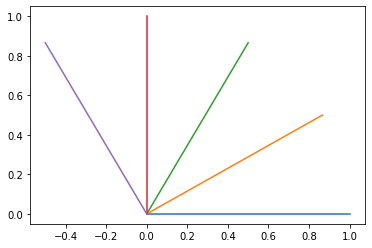

In [27]:
def vecplot(a):
    plt.plot([0,a[0]],[0,a[1]])

a=np.array([1,0])
vecplot(a)
b=np.dot(rot(np.pi/6),a)
vecplot(b)
c=np.dot(rot(np.pi/6),b)
vecplot(c)
d=np.dot(rot(np.pi/6),c)
vecplot(d)
e=np.dot(rot(np.pi/6),d)
vecplot(e)

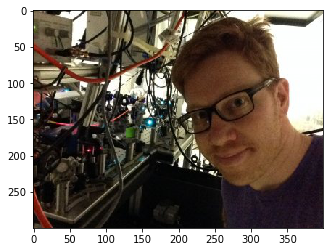

In [32]:
from PIL import Image
import requests
from io import BytesIO

url = r'https://www.bates.edu/faculty-expertise/wp-content/blogs.dir/263/files/2019/07/lichtman_photo-400x300.jpg'
response = requests.get(url)
img = Image.open(BytesIO(response.content))
plt.imshow(img)

uint8


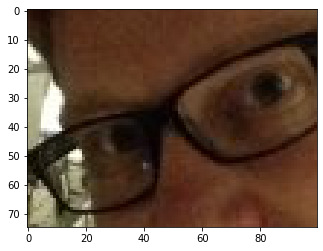

In [33]:
a=np.array(img)
print(a.dtype)
plt.imshow(a[100:175,200:300]);

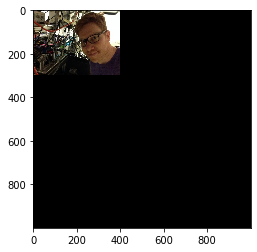

In [244]:
img2 = np.zeros((1000,1000,3),dtype=np.uint8)
img2[0:300,0:400,:]=np.array(img)
plt.imshow(img2)

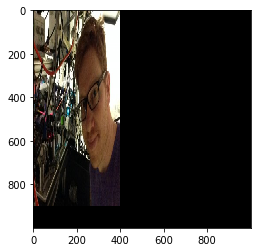

In [246]:
ind = np.indices(img2.shape[:2])  # get the x,y indices of each point in the image
#ind[0] -= int(img2.shape[0]/2)    # re-center the x indices to put the origin in the middle of the image
#ind[1] -= int(img2.shape[1]/2)    # re-center the y indices to put the origin in the middle of the image

#plt.imshow(ind[0])
#plt.colorbar()

S = np.array([[3,0],[0,1]])  # create a stretch

ind2 = np.dot(ind.T,np.linalg.inv(S)).T.astype(int)  # multiply to rotate the coordinate indices

#ind2[0] += int(img2.shape[0]/2)    # re-center the x indices to put the origin in the middle of the image
#ind2[1] -= int(img2.shape[1]/2)    # re-center the y indices to put the origin in the middle of the image

#print(ind2.shape)
#plt.figure()
#plt.imshow(ind2[0,:,:])
#plt.colorbar()

xmin = np.amin(ind[0])
ymin = np.amin(ind[1])
xmax = np.amax(ind[0])
ymax = np.amax(ind[1])

img3 = np.empty_like(img2)
for i in range(ind2.shape[1]):
    for j in range(ind2.shape[2]):
        x = ind2[0,i,j]
        y = ind2[1,i,j]
        if (xmin <= x <= xmax) and (ymin < y < ymax):
            img3[i,j] = img2[x,y]
        else:
            img3[i,j] = 0

plt.imshow(img3)

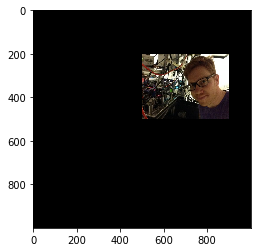

In [216]:
img2 = np.zeros((1000,1000,3),dtype=np.uint8)
img2[200:500,500:900,:]=np.array(img)
plt.imshow(img2)

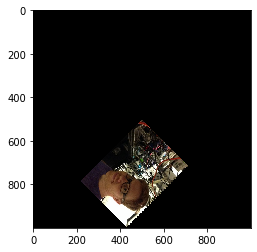

In [219]:
ind = np.indices(img2.shape[:2])  # get the x,y indices of each point in the image
ind[0] -= int(img2.shape[0]/2)    # re-center the x indices to put the origin in the middle of the image
ind[1] -= int(img2.shape[1]/2)    # re-center the y indices to put the origin in the middle of the image

#plt.imshow(ind[0])
#plt.colorbar()

R=rot(135*np.pi/180)  # create a rotation matrix
ind2 = np.dot(ind.T,np.linalg.inv(R)).T.astype(int)  # multiply to rotate the coordinate indices

ind2[0] += int(img2.shape[0]/2)    # re-center the x indices to put the origin in the middle of the image
ind2[1] -= int(img2.shape[1]/2)    # re-center the y indices to put the origin in the middle of the image

#print(ind2.shape)
#plt.figure()
#plt.imshow(ind2[0,:,:])
#plt.colorbar()

xmin = np.amin(ind[0])
ymin = np.amin(ind[1])
xmax = np.amax(ind[0])
ymax = np.amax(ind[1])

img3 = np.empty_like(img2)
for i in range(ind2.shape[1]):
    for j in range(ind2.shape[2]):
        x = ind2[0,i,j]
        y = ind2[1,i,j]
        if (xmin <= x <= xmax) and (ymin < y < ymax):
            img3[i,j] = img2[x,y]
        else:
            img3[i,j] = 0

plt.imshow(img3)

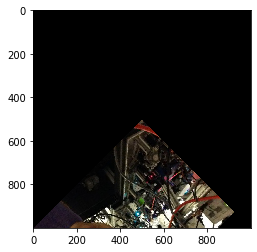

In [222]:
ind = np.indices(img2.shape[:2])  # get the x,y indices of each point in the image
ind[0] -= int(img2.shape[0]/2)    # re-center the x indices to put the origin in the middle of the image
ind[1] -= int(img2.shape[1]/2)    # re-center the y indices to put the origin in the middle of the image

#plt.imshow(ind[0])
#plt.colorbar()

R=rot(135*np.pi/180)  # create a rotation matrix
S= 2*np.identity(2)
Q = np.dot(R,S)

ind2 = np.dot(ind.T,np.linalg.inv(Q)).T.astype(int)  # multiply to rotate the coordinate indices

ind2[0] += int(img2.shape[0]/2)    # re-center the x indices to put the origin in the middle of the image
ind2[1] -= int(img2.shape[1]/2)    # re-center the y indices to put the origin in the middle of the image

#print(ind2.shape)
#plt.figure()
#plt.imshow(ind2[0,:,:])
#plt.colorbar()

xmin = np.amin(ind[0])
ymin = np.amin(ind[1])
xmax = np.amax(ind[0])
ymax = np.amax(ind[1])

img3 = np.empty_like(img2)
for i in range(ind2.shape[1]):
    for j in range(ind2.shape[2]):
        x = ind2[0,i,j]
        y = ind2[1,i,j]
        if (xmin <= x <= xmax) and (ymin < y < ymax):
            img3[i,j] = img2[x,y]
        else:
            img3[i,j] = 0

plt.imshow(img3)